In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
from scipy import stats
import warnings

In [24]:
import os
warnings.filterwarnings('ignore')

In [25]:
url = "https://drive.google.com/file/d/10NJWDYdJY9hgSIfkUACjUCMz6NuncLxR/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_udemy = pd.read_csv(url)

In [26]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8


In [34]:
df_udemy = df_udemy.drop(['url'], axis=1)

In [35]:
df_udemy.head()

,course_id,course_title,is_paid,price,num_subscribers,published_timestamp,subject,language
0,1070968,Ultimate Investment Banking Course,True,200,2147,2017-01-18T20:58:58Z,Business Finance,English
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,2017-03-09T16:34:20Z,Business Finance,English
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,2016-12-19T19:26:30Z,Business Finance,English
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,2017-05-30T20:07:24Z,Business Finance,English
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,2016-12-13T14:57:18Z,Business Finance,English


In [36]:
df_udemy['language']= df_udemy['language'].replace(['NoData'],'English')

In [37]:
df_udemy[['language']]

,language
0,English
1,English
2,English
3,English
4,English
...,...
3673,English
3674,English
3675,English
3676,English


In [38]:
df_udemy.describe(include=['object']).T

,count,unique,top,freq
course_title,3678,3663,Acoustic Blues Guitar Lessons,3
published_timestamp,3678,3672,2017-07-02T14:29:35Z,2
subject,3678,4,Web Development,1200
language,3678,16,English,3483


In [41]:
df_udemy.describe()

,course_id,price,num_subscribers
count,3.678000e+03,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625
std,3.432732e+05,61.005755,9504.117010
min,8.324000e+03,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000
50%,6.879170e+05,45.000000,911.500000
75%,9.613555e+05,95.000000,2546.000000
max,1.282064e+06,200.000000,268923.000000


<function matplotlib.pyplot.show(close=None, block=None)>

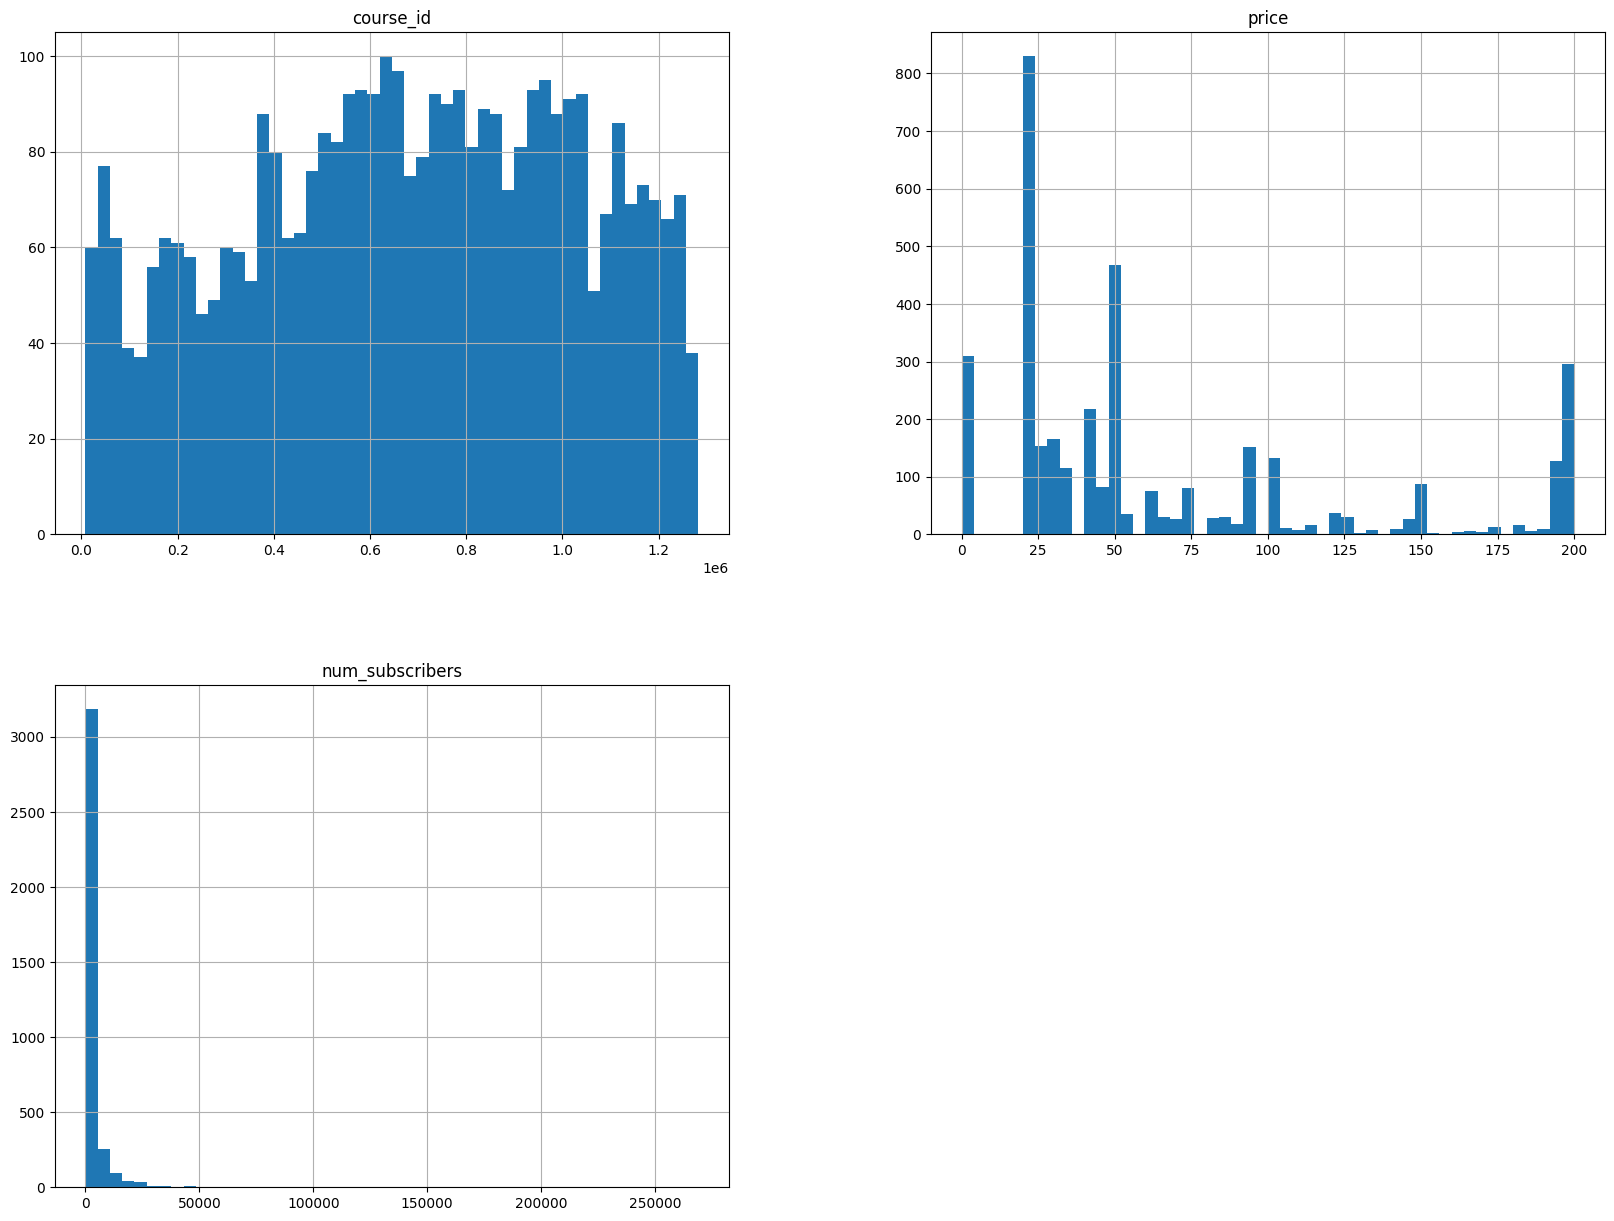

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
df_udemy.hist(bins = 50, figsize = (20,15))
plt.show

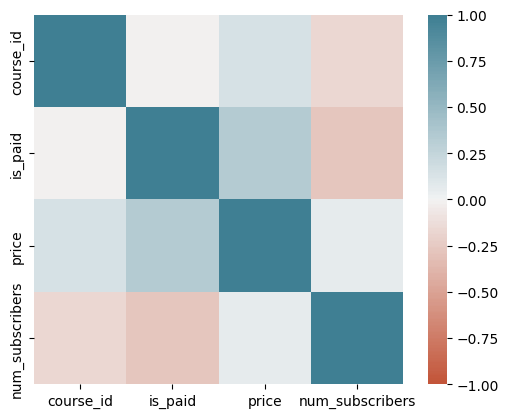

In [44]:
corr_matrix = df_udemy.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

array([[<Axes: xlabel='num_subscribers', ylabel='num_subscribers'>,
        <Axes: xlabel='price', ylabel='num_subscribers'>],
       [<Axes: xlabel='num_subscribers', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>]], dtype=object)

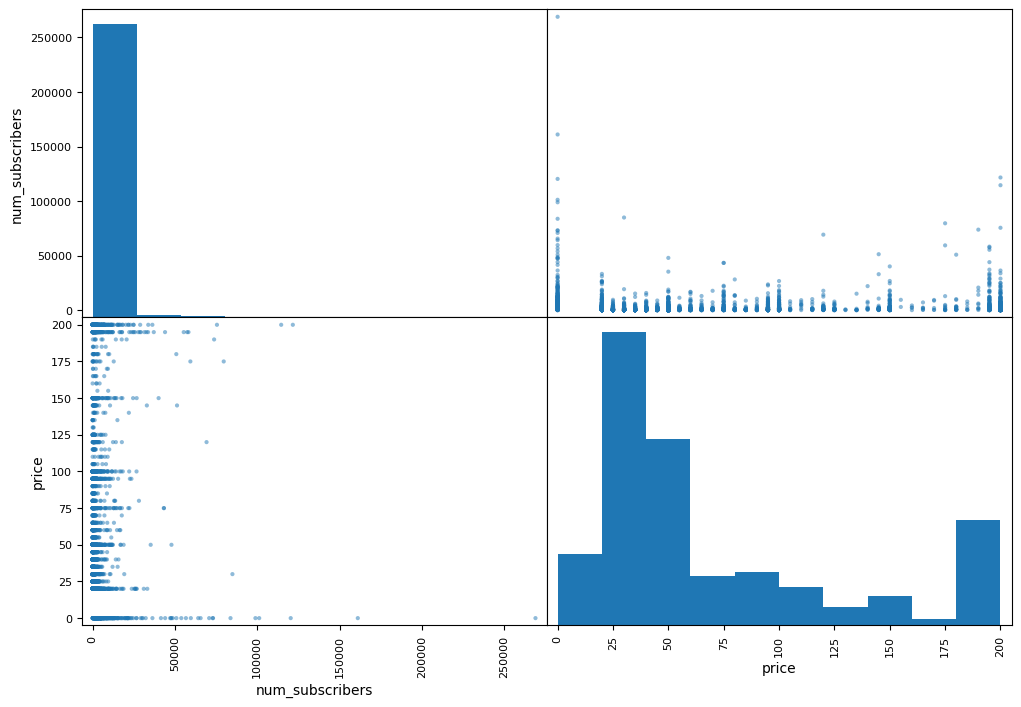

In [47]:
from pandas.plotting import scatter_matrix

attributes = ["num_subscribers", "price"]
scatter_matrix(df_udemy[attributes], figsize = (12,8))

In [49]:
df_udemy.to_excel('udemy_df.xlsx')